# Tarefa do Dataset do Grupo

O dataset escolhido pelo grupo foi "Life Expectancy" que se encontra https://www.kaggle.com/datasets/augustus0498/life-expectancy-who?select=led.csv.

Com este dataset, pretendemos definir um modelo que nos permita prever a esperança média de vida, dadas as caracteristicas populacionais, e identificar os valores que mais a influenciam.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
%matplotlib inline

## **Import Dataset & Analysis**

In [2]:
df = pd.read_csv("dataset/led.csv")
df_copy = df.copy()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [3]:
df_copy.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### *Análise de valores, colunas, etc*

* Esta dataset contêm 2938 instâncias e 22 atributos. Desses 22 atributos, 2 são categóricos("Country", "Status") e os restantes numéricos.
* Com este dataset pretendemos prever a esperança média de vida dependendo das caracteristicas populacionais. Assim, o nosso target será a coluna "lifeexpectancy". Dado que os valores desta coluna são numéricos, continuos, iremos implementar algoritmos de regressão.

Descrição das diferentes colunas do Dataset:
* **Status:** Developed and Developing
* **Lifeexpectancy:** Live Expectancy in years
* **AdultMortality:** Adult Mortality Rates (probability of dying between 15 and 60 years per 1000 population)
* **infantdeaths:** Number of Infant Deaths per 1000 population
* **Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* **percentageexpenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%) 
* **HepatitisB:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles:** Measles - number of reported cases per 1000 population
* **BMI:** Average Body Mass Index of entire population
* **under-fivedeaths:** Number of under-five deaths per 1000 population
* **Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Totalexpenditure:** General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP:** Gross Domestic Product per capita (in USD)
* **Population:** Population of the country
* **thinness1-19years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* **thinness5-9years:** Prevalence of thinness among children for Age 5 to 9(%)
* **Incomecompositionofresources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling:** Number of years of Schooling(years)

### *Duplicated Values*
Este dataset não tem linhas duplicadas.

In [4]:
df.duplicated().sum()

0

### *Missing values:*
Podemos observar que este dataset tem muitos missing values. Dado que existem um total de 2938 linhas, as colunas Population, GDP e HepatitisB apresentam uma elevada percentagem de missing values

In [5]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

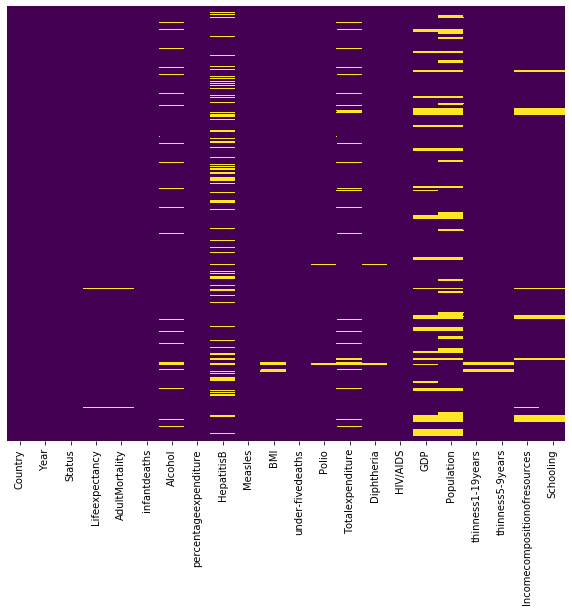

In [6]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Distribuição dos Atributos

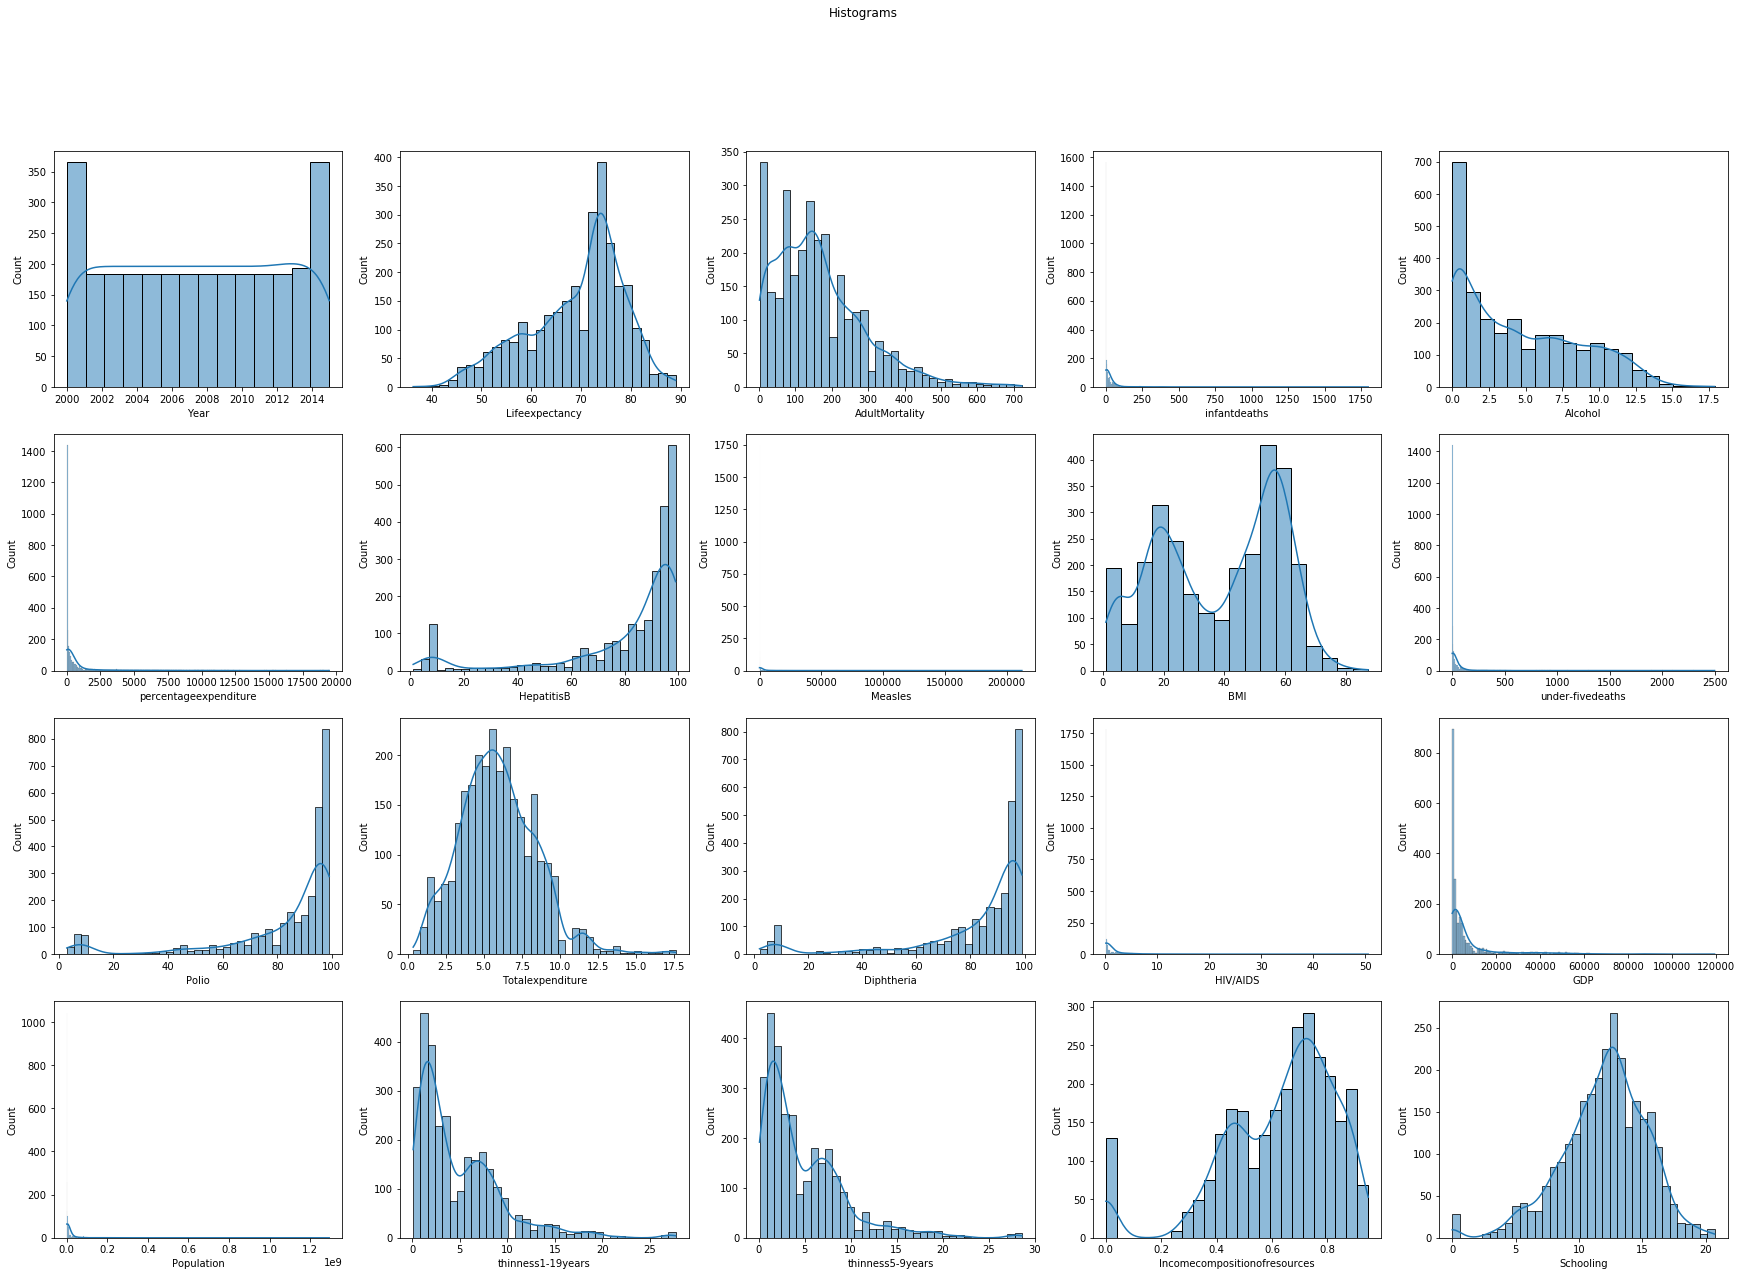

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [7]:
import warnings
warnings.filterwarnings("ignore")

def atributes_distribution(df):
    n_cols = 5; n_lines = 4
    fig, axs = plt.subplots(n_lines,n_cols,figsize=(30,20))
    fig.suptitle('Histograms')
    
    df_aux= df.select_dtypes(include=np.number)
    cols = list(df_aux.columns)

    i = 0; j = 0
    for x1 in cols:
        plt.figure(figsize = (10,8))
        sns.histplot(x = df[x1], data=df, ax=axs[i,j], kde=True)
        j = j + 1
        if(j == n_cols):
            i=i+1
            j = 0

atributes_distribution(df)

In [8]:
# Relação entre cada atributo:
def relation_attributes(df):
    sns.pairplot(df)
    plt.show()

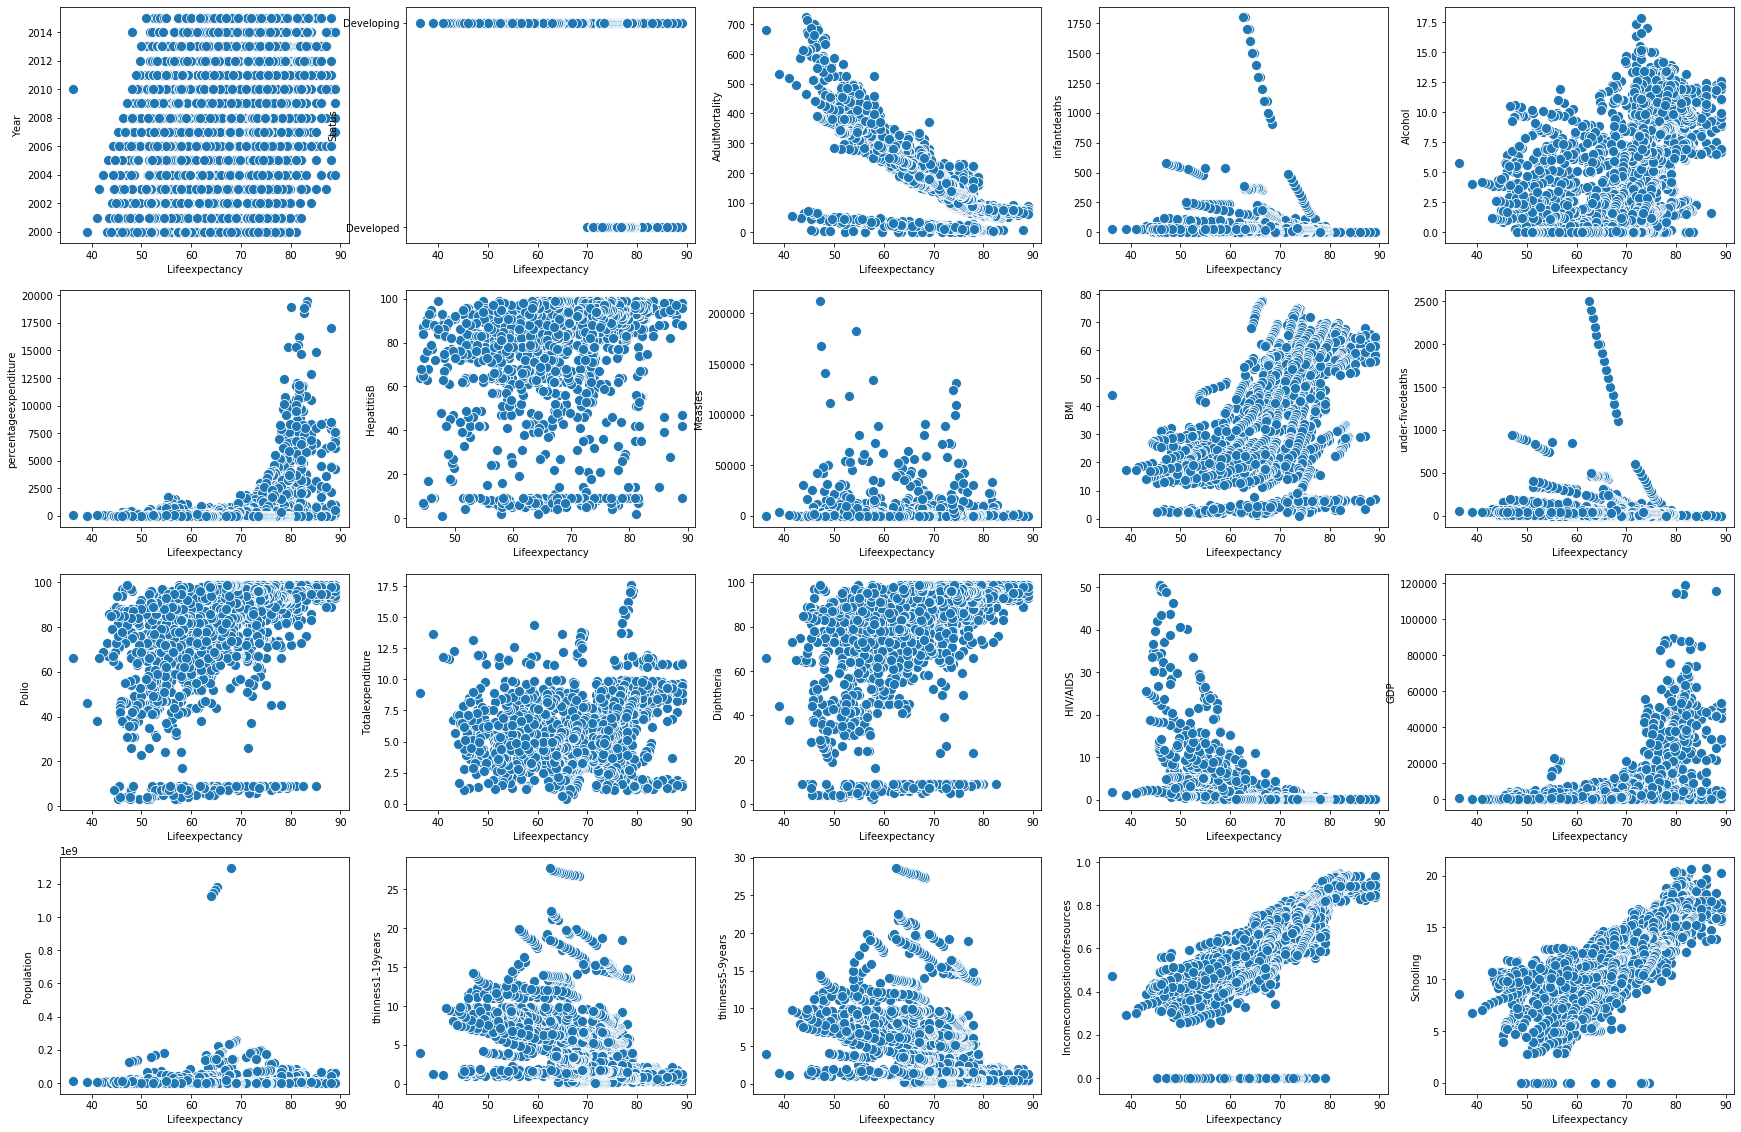

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [9]:
def relation_with_lifeexpectancy(df):
    n_cols = 5; n_lines = 4
    fig, axs = plt.subplots(n_lines,n_cols,figsize=(30,20))
    
    cols = list(df.columns)
    cols.remove("Lifeexpectancy")
    cols.remove("Country")
    i = 0; j = 0
    for c in cols:
        plt.figure(figsize = (10,8))
        sns.scatterplot(data=df, x = 'Lifeexpectancy', s = 100, y = c, ax = axs[i, j])
        j = j + 1
        if(j == n_cols):
            i=i+1
            j = 0        
            
relation_with_lifeexpectancy(df)

In [10]:
principalOutlier  = df[df.Lifeexpectancy == df.Lifeexpectancy.min()]
print(principalOutlier)

     Country  Year      Status  Lifeexpectancy  AdultMortality  infantdeaths  \
1127   Haiti  2010  Developing            36.3           682.0            23   

      Alcohol  percentageexpenditure  HepatitisB  Measles  ...  Polio  \
1127     5.76              36.292918         NaN        0  ...   66.0   

      Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
1127               8.9        66.0       1.9  662.279518   9999617.0   

      thinness1-19years  thinness5-9years  Incomecompositionofresources  \
1127                4.0               4.0                          0.47   

      Schooling  
1127        8.6  

[1 rows x 22 columns]


### *Correlation*


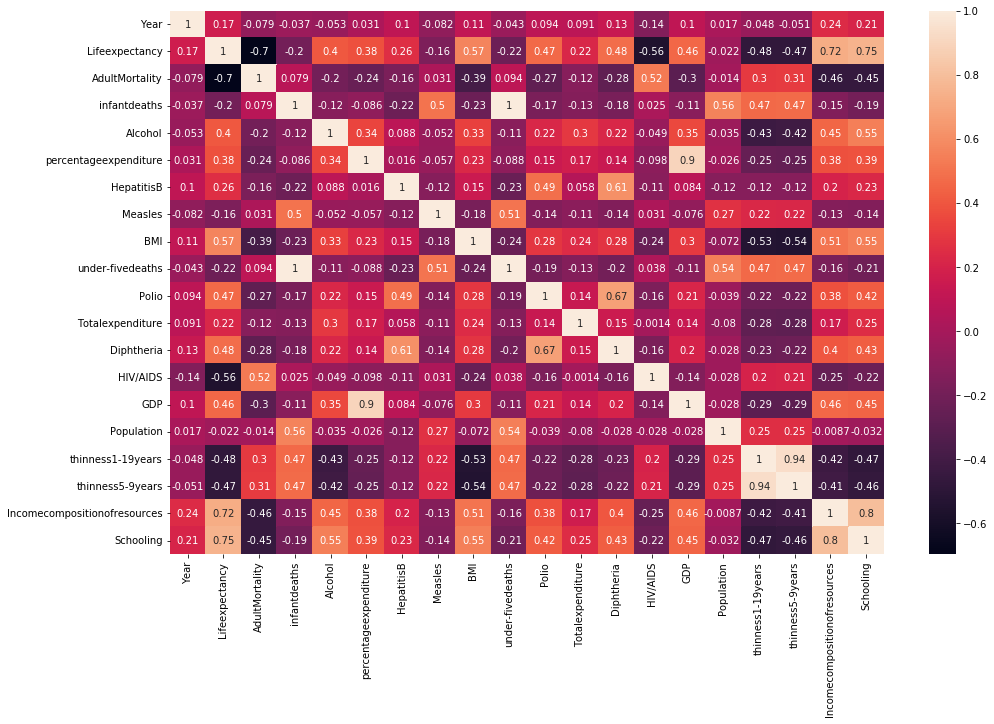

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

**Análise de Correlação:**

Podemos observar na tabela anterior que existem atributos com uma elevada correlação entre eles.
*Por exemplo*: "unde-fivedeaths" e "infantdeaths". "thinness5-9years" e "thinness1-19years". "GDP" e "percentageexpenditure".

### *Outliers*

In [12]:
def boxplots(df):
    n_cols = 5; n_lines = 4
    
    fig, axs = plt.subplots(n_lines,n_cols,figsize=(30,20))
    
    df_aux= df.select_dtypes(include=np.number)
    cols = list(df_aux.columns)
    cols.remove("Lifeexpectancy")
    i = 0; j = 0
    for x1 in cols:
        plt.figure(figsize = (8,8))
        sns.boxplot(x=df[x1], data = df, ax = axs[i, j])
        j = j + 1
        if(j == n_cols):
            i=i+1
            j = 0

#boxplots(df)

## **Preprocessing**

### *Handling Missing Values*

1) Drop Line

In [13]:
def drop_missing_values(df):
    df = df.dropna()
    return df

2) Replace with Mean

In [14]:
def replace_mean_missing_values(df):
    df = df.fillna(df.mean())
    return df

3) Group Mean\
Lifeexpectancy                   10\
AdultMortality                   10\
Alcohol                         194\
HepatitisB => Mean per Country (ou drop)\
BMI                              34\
Polio                            19\
Totalexpenditure => Mean per Country (ou drop)\
Diphtheria                       19\
GDP => Mean per Country (ou drop)\
Population => Mean by Country (ou drop)\
thinness1-19years                34\
thinness5-9years                 34\
Incomecompositionofresources    167\
Schooling  => Mean by Country\

In [15]:
def replace_mean_country(df):        
    df_final = df.copy()
    col = ['Alcohol','Schooling', 'Incomecompositionofresources', 'thinness5-9years', 'thinness1-19years', 'Population', 'GDP', 'Diphtheria', 'Totalexpenditure',
          'Polio', 'BMI', 'HepatitisB','AdultMortality', 'Lifeexpectancy']
    
    for x in col:
        vals = df.groupby('Country')[x].mean()     #Gets the mean of the values of each country for each column with missing values
        for y,z in zip(vals.index, vals):          #For each Country, gets the value calculated with the mean
            df_aux = df.loc[df['Country'] == y, x] #Gets the values of the column x with missing values of the country y
            df_aux = df_aux.fillna(z)              #Replace the missing values with the mean
            df.loc[df['Country'] == y, x] = df_aux
    return df

### *Handling categorical data*

In [16]:
from sklearn.preprocessing import OneHotEncoder

#Label encoding:
label_encoding = False
#One Hot Encoding:
one_hot_encoding = True

In [17]:
def replace_map(df, column_name):
    labels = df[column_name].astype('category').cat.categories.tolist()
    replace_map = {column_name : {k: v for k,v in zip(labels, list(range(1,len(labels)+1)))}}
    
    return replace_map

1) Drop Country:

In [18]:
def drop_country(df):
    df_country_drop = df.drop(['Country'], axis=1)
    return df_country_drop

2) Drop Status

In [19]:
def drop_status(df):
    df_status_drop = df.drop(['Status'], axis=1)
    return df_status_drop

3) Encoding Country

In [20]:
def encoding_country(df):
    label_encoding = True
    one_hot_encoding = False
    df_encoding_country = df.copy()
    if(label_encoding):
        replace_map_country = replace_map(df_encoding_country, 'Country')    
        df_encoding_country.replace(replace_map_country, inplace=True)
        df_encoding_country.head()
    if(one_hot_encoding):
        ohe = OneHotEncoder()
        transformed_country = ohe.fit_transform(df_encoding_country[['Country']])
        df_encoding_country[ohe.categories_[0]] = transformed_country.toarray()
        df_encoding_country = df_encoding_country.drop(['Country'], axis=1)
    return df_encoding_country

4) Encoding Status

In [21]:
def encoding_status(df):
    df_encoding_status = df.copy()
    if(label_encoding):
        replace_map_status = replace_map(df_encoding_status, 'Status')
        df_encoding_status.replace(replace_map_status, inplace=True)
        df_encoding_status.head()
    if(one_hot_encoding):
        ohe = OneHotEncoder()
        transformed_status = ohe.fit_transform(df_encoding_status[['Status']])
        df_encoding_status[ohe.categories_[0]] = transformed_status.toarray()
        df_encoding_status = df_encoding_status.drop(['Status'], axis=1)
    
    return df_encoding_status

### *Feature Selection*

In [22]:
from sklearn.decomposition import PCA

def feature_selection_PCA(X):
    X.info()
    pca = PCA(n_components=0.95, svd_solver='full')
    X_pca = pca.fit_transform(X)
    
    print("Explained Variance: ")
    print(pca.explained_variance_ratio_)
    print("\nN components: ")
    print(pca.n_components_)
    
    return pd.Dataframe(X_pca)


def feature_selection(df):
    #Column Country is drop: It is not really relevant for what we are trying to predict, and it doesn't really has correlation to other values
    df.drop(['Country'], axis=1, inplace=True)    
    #Column Year is drop: Similar to the previous one:
    df.drop(['Year'], axis=1, inplace=True)
    #Column Population: this column has a lot of missing values, and as we can see, it has a low correlation
    df.drop(['Population'], axis=1, inplace=True)
    
    df = drop_infantsdeaths(df)

In [23]:
def drop_thiness119years(df):
    df_drop= df.drop(['thinness1-19years'],axis=1)
    return df_drop

In [24]:
def drop_thiness59years(df):
    df_drop= df.drop(['thinness5-9years'],axis=1)
    return df_drop

In [25]:
def drop_GDP(df):
    df_drop= df.drop(['GDP'],axis=1)
    return df_drop

In [26]:
def drop_percentageexpenditure(df):
    df_drop= df.drop(['percentageexpenditure'], axis=1)
    return df_drop

In [27]:
def drop_under5deaths(df):
    df_drop= df.drop(['under-fivedeaths'], axis=1)
    return df_drop

In [28]:
def drop_infantsdeaths(df):
    df_drop= df.drop(['infantdeaths'], axis=1)
    return df_drop

In [29]:
def drop_Incomecompositionofresources(df):
    df_drop= df.drop(['Incomecompositionofresources'],axis=1)
    return df_drop

In [30]:
def drop_schooling(df):
    df_drop= df.drop(['Schooling'],axis=1)
    return df_drop

### *Data Normalization*

In [31]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [32]:
def minMaxScaler(df):
    df_scaled = df.copy()
    scaler = MinMaxScaler()
    df_scaled_cols = df.columns
    df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled_cols)
    return df_scaled#, scaler

def normalizer(df):
    normalizer = Normalizer() # norm{‘l1’, ‘l2’, ‘max’}, default=’l2’
    df_cols = df.columns
    df_scaled = pd.DataFrame(normalizer.fit_transform(df), columns=df_cols)
    return df_scaled

### Handling Outliers

In [33]:
from scipy import stats

def handling_outliers(df):
    cols = list(df.columns)
    
    if 'Developed' in cols:
        cols.remove('Developed')
    
    if 'Developing' in cols:
        cols.remove('Developing')
    
    for x in cols:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        lower_whisker = Q1 - (whisker_width*IQR)
        upper_whisker = Q3 + (whisker_width*IQR)
        df[x] = np.where(df[x]>upper_whisker,upper_whisker,np.where(df[x]<lower_whisker,lower_whisker,df[x]))
        

## **Regression Models**

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [35]:
def preprocessing(df): 
    atributes_distribution(df)
    # Handling missing data:
    df = replace_mean_missing_values(df) #df.dropna()
    
    # Call function to handle categorical data:
    # df = drop_status(df) 
    df = encoding_status(df)
    # df = encoding_country(df)
    
    # Feature Selection:
    feature_selection(df)
    
    #handling_outliers(df)
    #boxplots(df)
    
    return df


def evaluation_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print(model.feature_importances_)
    print(model.feature_names_in_)
    
    plt.scatter(y_test,y_pred)
    plt.x = "Y Expected"
    plt.y = "Y Predicted"

    print("R2 Score: %.3f" % r2_score(y_test, y_pred))
    print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
    print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
    print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))
    

### *Regression Algorithm & Fit Model*

[0.09515976 0.01231075 0.00712649 0.00371197 0.00307862 0.00342116
 0.03413149 0.04367231 0.02132185 0.0047567  0.031433   0.13359709
 0.00841663 0.02086655 0.02924155 0.14781179 0.06612239 0.00496315
 0.00490356 0.32395317]
['AdultMortality' 'infantdeaths' 'Alcohol' 'percentageexpenditure'
 'HepatitisB' 'Measles' 'BMI' 'under-fivedeaths' 'Polio'
 'Totalexpenditure' 'Diphtheria' 'HIV/AIDS' 'GDP' 'thinness1-19years'
 'thinness5-9years' 'Incomecompositionofresources' 'Schooling' 'Developed'
 'Developing' 'Lifeexpectancy']
R2 Score: 0.993
mean square error: 0.6464761399571275
mean absolute error: 0.49380585845745534
root mean square error: 0.8040373996009934


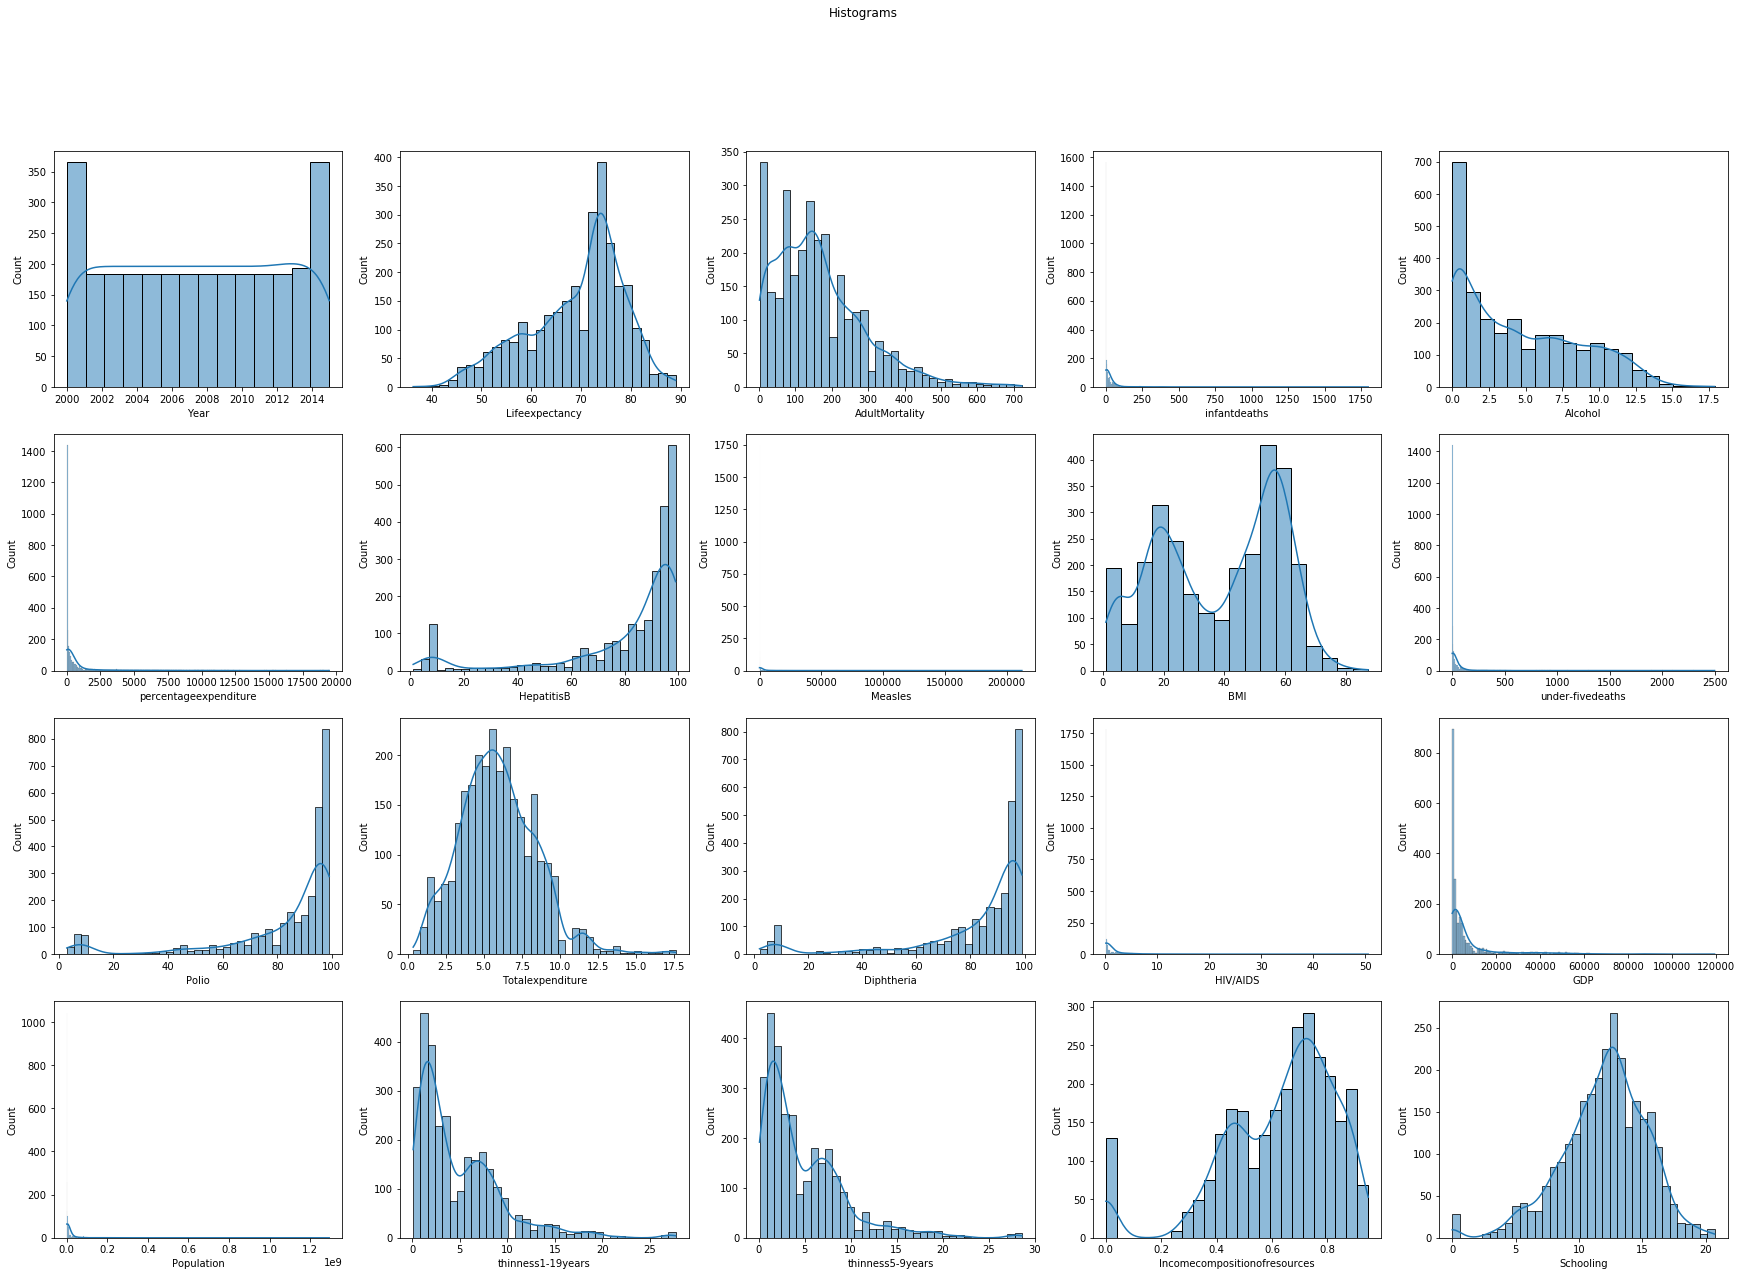

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

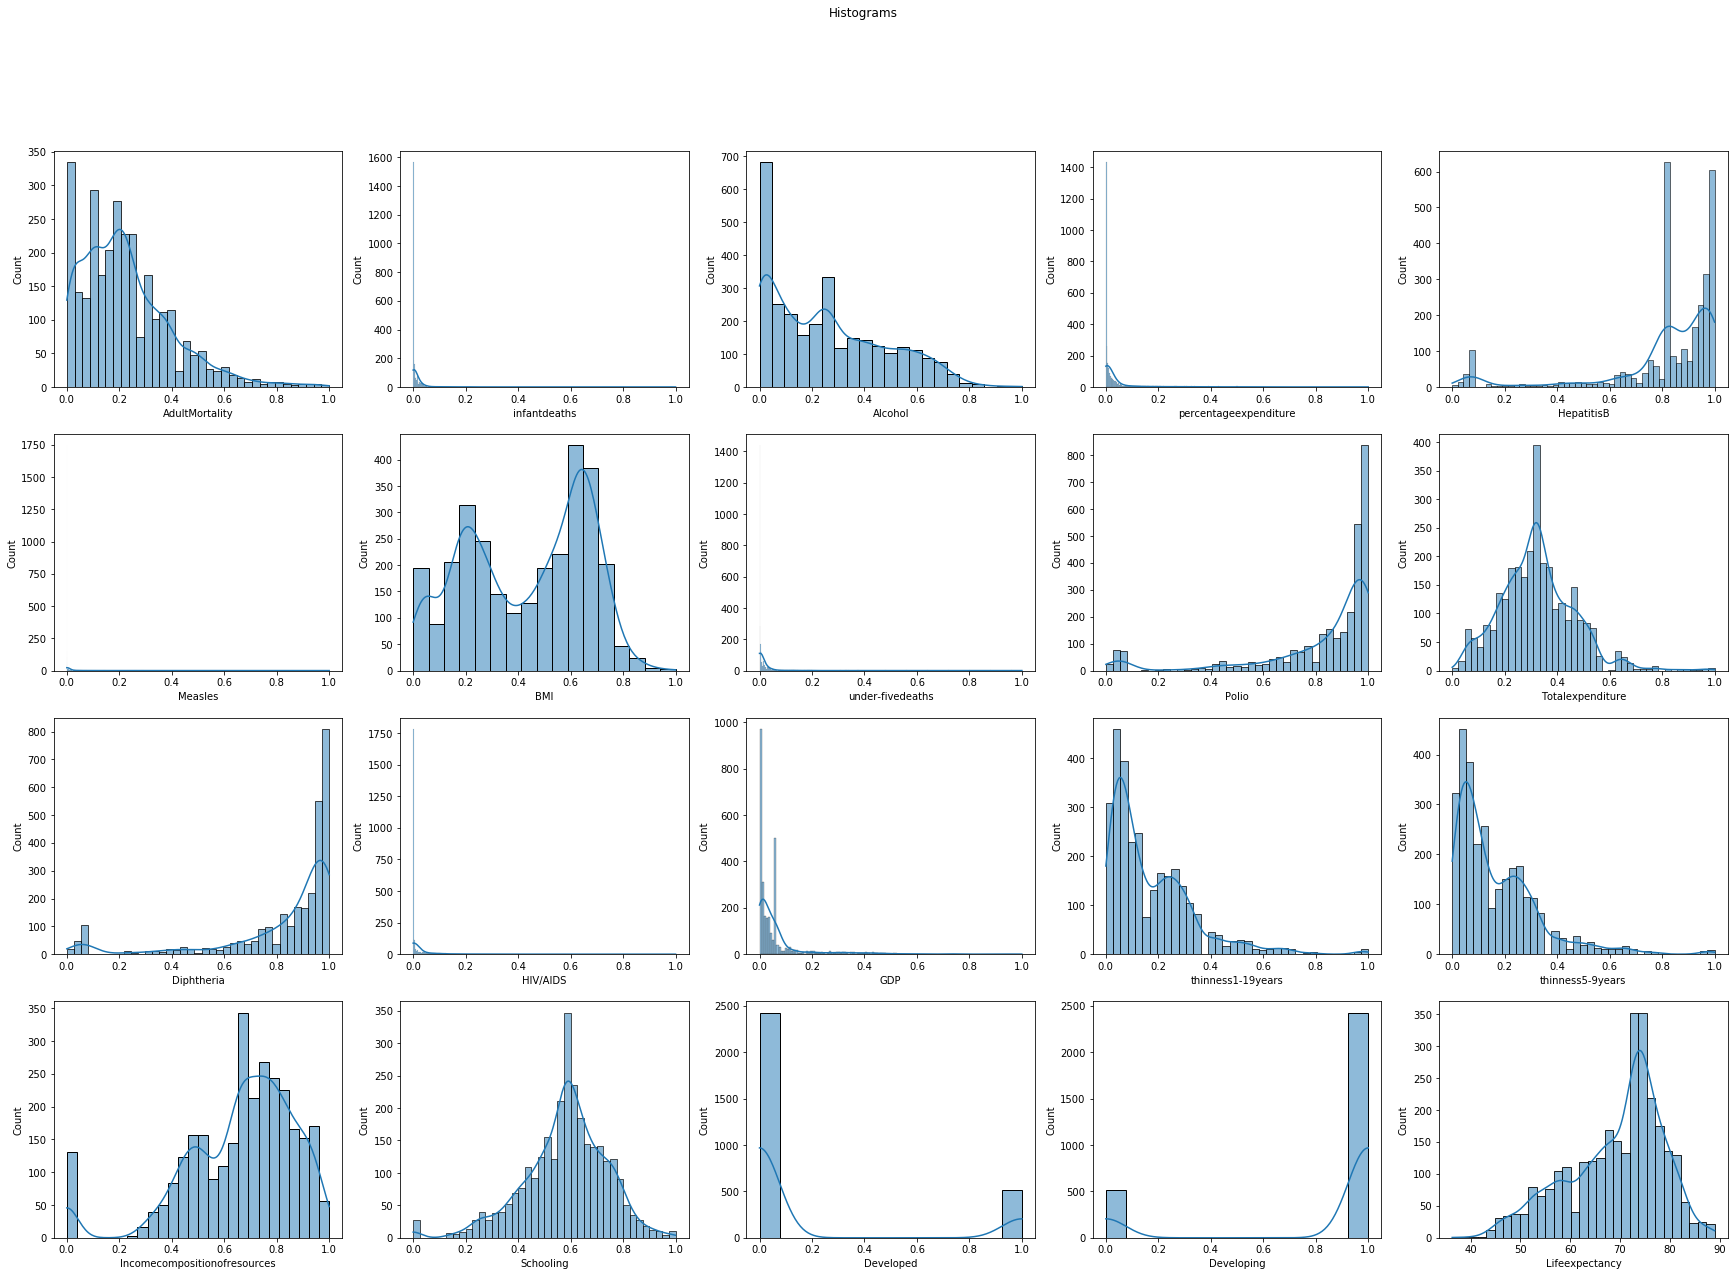

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

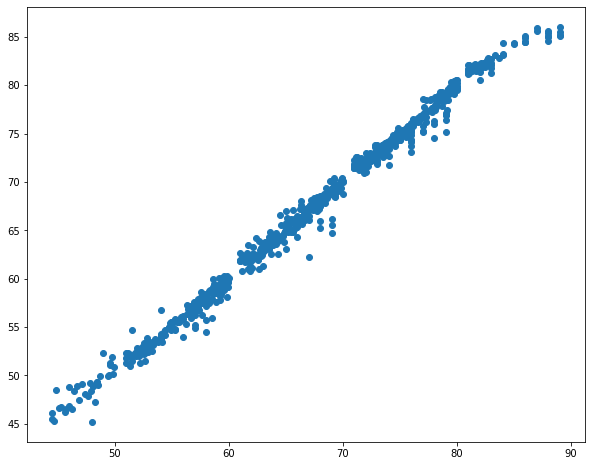

In [36]:
gridsearch = False
linear = False
svr = False
ridge = False
sgd = False
rdr = True
lasso = False

RANDOM_STATE = 2022

df = preprocessing(df)

X = df.drop(['Lifeexpectancy'], axis=1)
y = df['Lifeexpectancy']

scaled_X = minMaxScaler(X)
df_scaled = scaled_X
df_scaled['Lifeexpectancy'] = y

# relation_attributes(df_scaled)
atributes_distribution(df_scaled)

#sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
#df.info()

#plt.figure(figsize = (16,10))
#sns.heatmap(df_new.corr(), annot=True)


if(not(gridsearch)):
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.33, random_state=2022)
    
    if(linear):
        model = LinearRegression()
        model.fit(X_train, y_train)
        
    elif(svr):
        model = SVR(random_state= RANDOM_STATE)
        model.fit(X_train, y_train)
        
    elif(ridge):
        # apply model with CV
        model = Ridge(random_state= RANDOM_STATE)
        model.fit(X_train, y_train)
        
    elif(sgd):
        model = SGDRegressor(random_state= RANDOM_STATE)
        model.fit(X_train, y_train)
        
    elif(rdr):
        model = RandomForestRegressor(criterion = 'squared_error', max_features='sqrt', n_estimators = 115, random_state= RANDOM_STATE) # 
        # , max_depth = 10, n_estimators=120
        model.fit(X_train, y_train)
        
    elif(lasso):
        model = Lasso(random_state= RANDOM_STATE)
        model.fit(X_train, y_train)
        
    evaluation_model(model, X_test, y_test)

## **GridSearch**

In [37]:
if(gridsearch):
    
    if(ridge):
        model = Ridge()
        #'normalize': [True, False], 'fit_intercept': [True, False],
        parameters = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],'alpha': [0.5, 0.3, 0.7], 'max_iter': [20000, 17000, 23000]}
    
    
    if(rdr):
        model = RandomForestRegressor()
        parameters = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_features':['sqrt','log2'], 'n_estimators' : [115, 125]}  
        
    if(linear):
        model = LinearRegression()
        
        
    
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

    result = grid.fit(scaled_X,y)

    print(" ************************************************************************************************ " )
    print("\n Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",result.best_estimator_)
    print("\n The best score across ALL searched params:\n",result.best_score_)
    print("\n The best parameters across ALL searched params:\n",result.best_params_)
    print(" ************************************************************************************************ " )


RDR:
* replace_mean_missing_values(df); drop_status(df); feature_selection(df_new); drop_infantsdeaths(df_new); 'criterion': ['squared_error','poisson']; n_estimators = [80,100,120]; max_depth=10\
    * MSE: 3.73 RMSE: 1.93 => criterion = "squared_error", n_estimators = 120

* replace_mean_missing_values(df); drop_status(df); feature_selection(df_new); drop_infantsdeaths(df_new); 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']; n_estimators = [120]; max_depth=10\
    * squared_error
    * Quando dado todos os criterion para ser testados com as restantes valores, o melhor valor foi obtido com o criterion default

* replace_mean_missing_values(df); drop_status(df); feature_selection(df_new); drop_infantsdeaths(df_new); 'criterion': ['squared_error'];'max_features':['sqrt','log2',1]; 'n_estimators' : [115, 125]; max_depth=10\
    * max_features = sqrt; n_estimators = 125 MSE: 3.89 RMSE: 1.97

* replace_mean_missing_values(df); encoding_status(df); feature_selection(df_new); 'criterion'='squared_error';'max_features':['sqrt','log2']; 'n_estimators' : [115, 125]\ 
        * max_features=log2; n_estimators=115 
        
* replace_mean_missing_values(df); encoding_status(df); feature_selection(df_new); 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_features':['sqrt','log2'], 'n_estimators' : [115, 125]\
    * 'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 115 MSE: 3.40 RMSE: 1.84
    
    

* Linear: 
    * Drop Both, Drop NA:                      MSE = 12,96 RMSE = 3,6
    * Drop Country, Drop NA:                   MSE = 12,87 RMSE = 3,59
    * Drop Country, Year, OHE Status, Drop NA: MSE = 13.27 RMSE= 3,64
    * Drop Country, Year, OHE Status, Replace by Country & Drop NA: MSE = 16.07 RMSE= 4.01
    * Drop Country, Year, OHE Status, Replace NA: MSE = 16.45 RMSE= 4.06
    * Drop Country, Year, Population, OHE Status, Replace by Country & Drop NA: MSE = 15.78 RMSE = 3.97

# Redes Neuronais

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

2023-01-04 16:46:11.972192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 16:46:12.188316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 16:46:12.188339: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 16:46:14.379020: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [39]:
df_copy

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


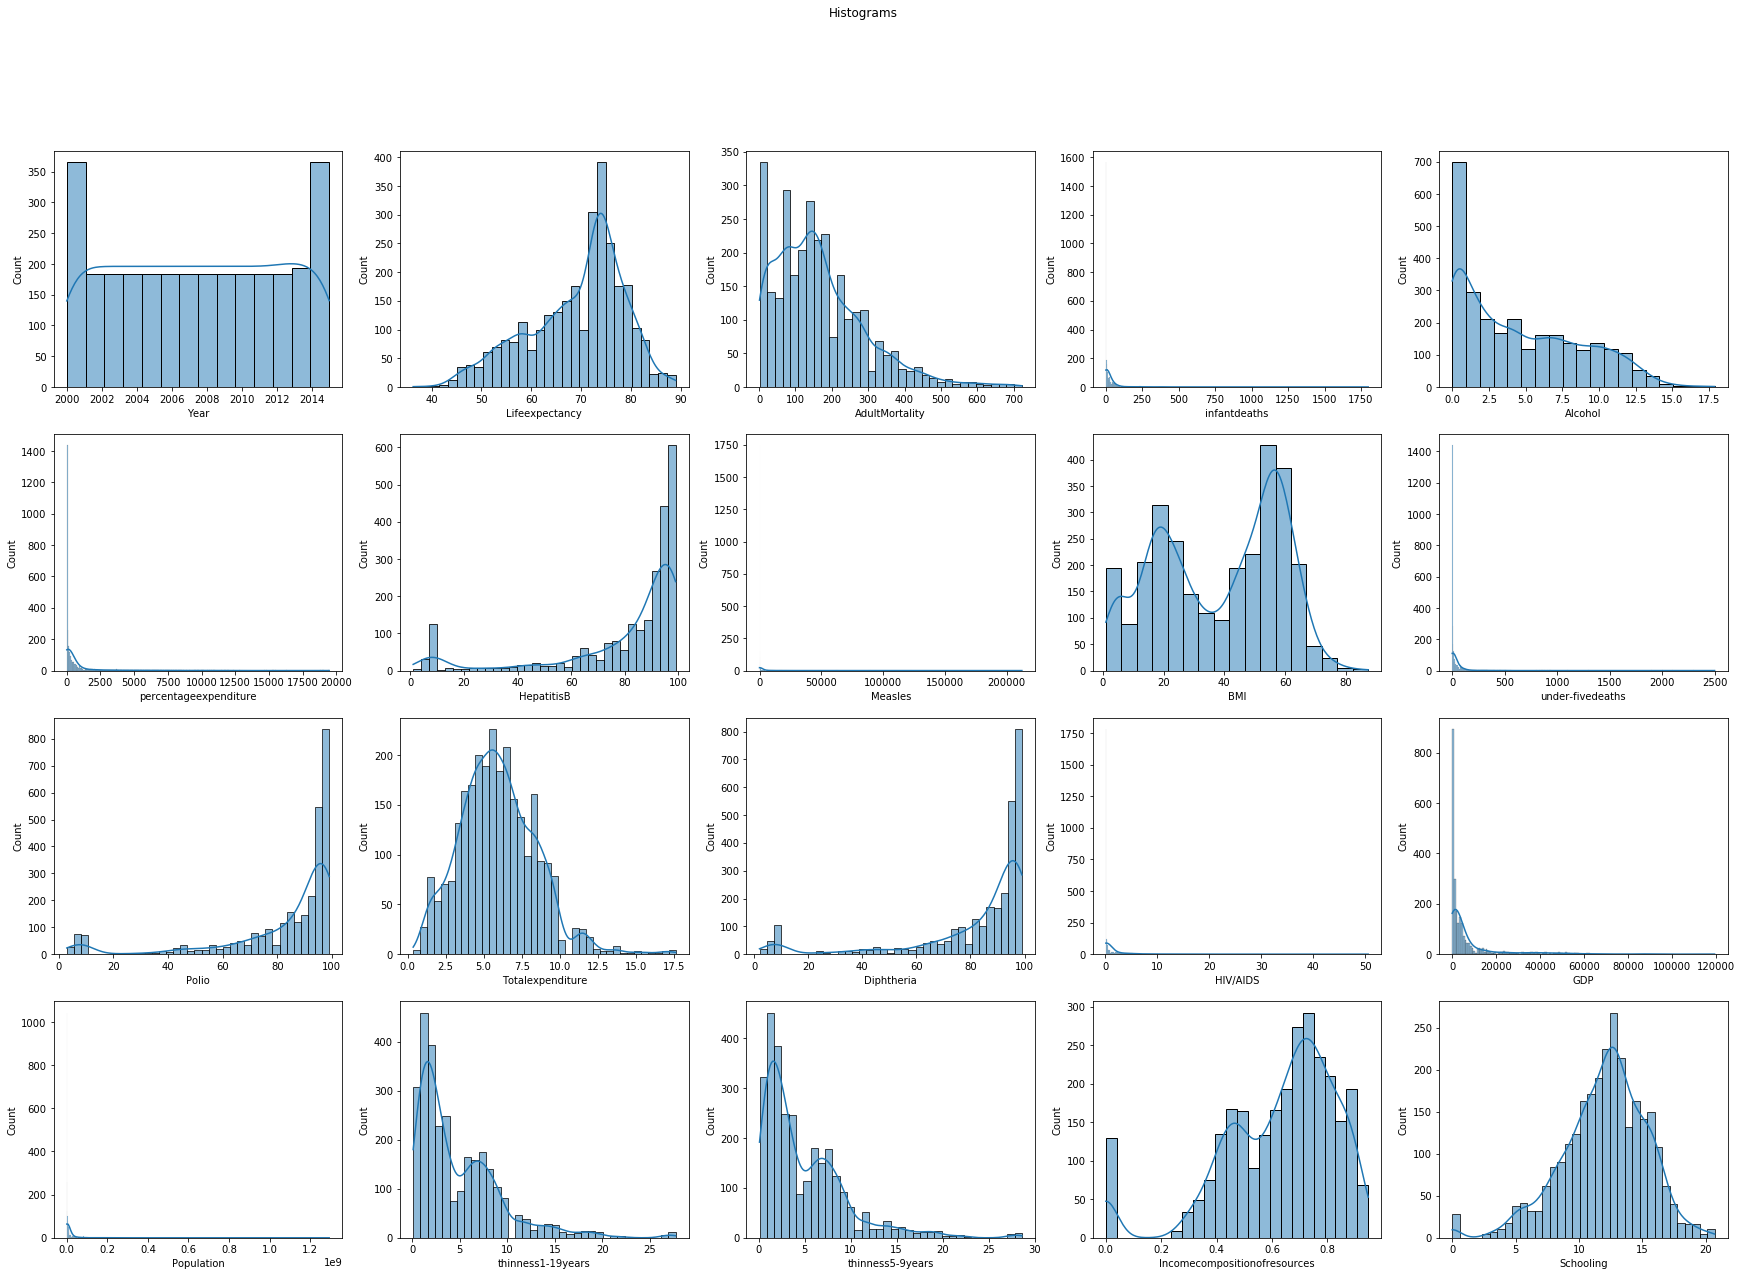

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [40]:
df_nn = preprocessing(df_copy)

In [41]:
df_nn

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0.0,1.0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,0.0,1.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,0.0,1.0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,0.0,1.0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,0.0,1.0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,0.0,1.0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,0.0,1.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,0.0,1.0


In [42]:
X = df_nn.drop('Lifeexpectancy', axis=1)
y = df_nn[['Lifeexpectancy']]

## Normalização

In [43]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns = y.columns)

print(X_scaled)

      AdultMortality  infantdeaths   Alcohol  percentageexpenditure  \
0           0.362881      0.034444  0.000000               0.003659   
1           0.373961      0.035556  0.000000               0.003774   
2           0.369806      0.036667  0.000000               0.003759   
3           0.375346      0.038333  0.000000               0.004014   
4           0.379501      0.039444  0.000000               0.000364   
...              ...           ...       ...                    ...   
2933        1.000000      0.015000  0.243561               0.000000   
2934        0.988920      0.014444  0.226764               0.000000   
2935        0.099723      0.013889  0.247480               0.000000   
2936        0.948753      0.013889  0.095745               0.000000   
2937        0.919668      0.013333  0.093505               0.000000   

      HepatitisB   Measles       BMI  under-fivedeaths     Polio  \
0       0.653061  0.005439  0.209733            0.0332  0.031250   
1       0.6

In [44]:
print(y_scaled)

      Lifeexpectancy
0           0.544592
1           0.447818
2           0.447818
3           0.440228
4           0.434535
...              ...
2933        0.151803
2934        0.155598
2935        0.161290
2936        0.170778
2937        0.184061

[2938 rows x 1 columns]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=2022)

In [46]:
def build_model(act = 'relu'):
    model = Sequential()
    model.add(Dense(16, input_dim = 19, activation=act))
    model.add(Dense(8, activation=act))
    model.add(Dense(4, activation=act))
    #model.add(Dense(2, activation=act))
    model.add(Dense(1, activation=act))
    
    model.compile(
        loss='mae',
        optimizer = tf.optimizers.Adam(0.01),
        metrics = ['mae', 'mse'])
    
    return model
    
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


2023-01-04 16:46:41.028585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-04 16:46:41.028615: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-04 16:46:41.028645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marianapc): /proc/driver/nvidia/version does not exist
2023-01-04 16:46:41.029150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model_nn = KerasRegressor(build_fn=build_model, epochs = 100, batch_size=32)
model_nn.fit(X_train, y_train, validation_split=0.3)

pred = model_nn.predict(X_test)

y_pred = np.reshape(pred, (-1,1))

y_pred_original = scaler_y.inverse_transform(y_pred)

y_test_original = scaler_y.inverse_transform(y_test)


print(y_pred_original[:5])
print(y_test_original[:5]) 

#y_pred_original.shape()
#y_test_original.shape()

array = [[y_test, y_pred], [y_test_original, y_pred_original]]

plt.scatter(y_test,y_pred)
plt.x = "Y Expected"
plt.y = "Y Predicted"

print("R2 Score: %.3f" % r2_score(y_test,y_pred))
print("mean square error: "+ str(mean_squared_error(y_test,y_pred)))
print("mean absolute error: "+ str(mean_absolute_error(y_test,y_pred)))
print("root mean square error: "+ str(mean_squared_error(y_test,y_pred, squared= False)))
print("---------------------------------------------------------------------------------\n")  



Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6296 - mae: 0.6296 - mse: 0.4289 - val_loss: 0.6167 - val_mae: 0.6167 - val_mse: 0.4130
Epoch 7/100
45/45 [===

In [ ]:
plt.scatter(y_test_original,y_pred_original)
plt.x = "Y Expected"
plt.y = "Y Predicted"

print("R2 Score: %.3f" % r2_score(y_test_original,y_pred_original))
print("mean square error: "+ str(mean_squared_error(y_test_original,y_pred_original)))
print("mean absolute error: "+ str(mean_absolute_error(y_test_original,y_pred_original)))
print("root mean square error: "+ str(mean_squared_error(y_test_original,y_pred_original, squared= False)))
print("---------------------------------------------------------------------------------\n")    